# Conectando a Drive

In [174]:

ruta_archivo1 = 'data/products_df.csv'
ruta_archivo2 = 'data/commercial_activity_df.csv'
ruta_archivo3 = 'data/sociodemographic_df.csv'

# Importando paquetes

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [176]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Inspeccionando los datos

In [177]:
df_com_act = pd.read_csv(ruta_archivo2)
df_products = pd.read_csv(ruta_archivo1)
df_sociodem = pd.read_csv(ruta_archivo3)

## Commercial activity

* pk_cid: Identificador de cliente
* pk_partition: Fecha de ingesta de los datos
* entry_date: Fecha en la que realizó la primera contratación a través de easyMoney
* entry_channel: Canal de captación del cliente
* active_customer: Indicador de actividad del cliente en nuestra aplicación
* segment: Segmento comercial del cliente

In [178]:
df_com_act.head()

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [179]:
'''Cosas que hacer'''
# Eliminar la columna unnamed porque es un índice duplicado
# UNA VEZ UNAMOS LAS TABLAS (por pk_cid + pk_partition) - Eliminar la columna del id de cliente
# Ideas para fechas - sacar día de la semana, mes o año, diferencia entre entrada de datos y primera consulta...
# Convertir entry_channel en categórica y/o crear dummies
# Convertir active customer en int
# Convertir segment en categórica y dejar o solo numeros o solo palabra + crear dummies para el modelo

'Cosas que hacer'

In [180]:
df_com_act.shape

(5962924, 7)

In [181]:
# Eliminamos la columna del índice
df_com_act=df_com_act.drop('Unnamed: 0', axis=1)

## Products

* pk_cid: Identificador de cliente
* pk_partition: Fecha de ingesta de los datos
* short_term_deposit
* loans
* mortgage
* funds: fondos de inversión
* securities: valores
* long_term_deposit
* em_account_p: Cuenta easyMoney+
* em_account_pp: Cuenta easyMoney++
* em_acount: Cuenta easyMoney
* emc_account: Cuenta easyMoney Crypto
* credit_card
* pay_roll: domiciliaciones
* pension_plan
* pay_roll_account
* debit_card

In [182]:
df_products.head()

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [183]:
df_products.shape

(5962924, 18)

In [184]:
'''Cosas que hacer'''
# Eliminar la columna unnamed porque es un índice duplicado
# Una vez unidas las tablas, eliminar pk_cid
# Convertir payroll y pension_plan en int

'Cosas que hacer'

In [185]:
# Eliminamos la columna del índice
df_products=df_products.drop('Unnamed: 0', axis=1)

## Sociodemographic

In [186]:
df_sociodem.head()

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,4,1050614,2018-01-28,ES,50.0,V,23,N,NaN


In [187]:
# eliminar columna unnamed
# unir por pk_cid y partition y luego eliminar id
# convertir contry code en int + categórica
#convertir gender en 1 o 0
#convertir deceased en 1 o 0

In [188]:
df_sociodem.shape

(5962924, 9)

In [189]:
# Eliminamos la columna del índice
df_sociodem=df_sociodem.drop('Unnamed: 0', axis=1)

## Uniendo los datasets

Dado que tienen la misma Q de filas, vamos a unir por las columnas en común: pk_cid y pk_partition

In [190]:
df_products.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [191]:
df=df_com_act.merge(df_products, how='left', on=['pk_cid', 'pk_partition'])\
            .merge(df_sociodem, how='left', on=['pk_cid', 'pk_partition'])

In [192]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1,ES,50.0,V,23,N,NaN


# Data cleaning

## Variables con nulos

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 27 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   entry_date          object 
 3   entry_channel       object 
 4   active_customer     float64
 5   segment             object 
 6   short_term_deposit  int64  
 7   loans               int64  
 8   mortgage            int64  
 9   funds               int64  
 10  securities          int64  
 11  long_term_deposit   int64  
 12  em_account_pp       int64  
 13  credit_card         int64  
 14  payroll             float64
 15  pension_plan        float64
 16  payroll_account     int64  
 17  emc_account         int64  
 18  debit_card          int64  
 19  em_account_p        int64  
 20  em_acount           int64  
 21  country_id          object 
 22  region_code         float64
 23  gender              object 
 24  age                 int6

In [194]:
df.isna().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
dtype: int64

### Variable region code

Aquí he mapeado las regiones según el código asociado a la comunidad autónoma, y para los valores nan he puesto 999: desconocido.

In [195]:
df.region_code.max()

52.0

In [196]:
df.region_code.min()

1.0

In [197]:
df.country_id.value_counts()

country_id
ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: count, dtype: int64

In [198]:
#he comprobado con df.query que la mayoría de regiones (excepto 12 son de países fuera de España)
#esto tiene sentido porque sospecho que los números equivalen a provincias españolas (según el INE), no hay ningún número
# de región asociado en el resto de países
# Por eso, reemplazo los nulos con 999, dado que no tiene sentido sustituirlos por otra cosa
df['region_code']=np.where(df['region_code'].isna(),999,df['region_code'])

In [199]:
# Compruebo que no quedan nulos, y cambio el tipo de variable a categórica (para que el futuro modelo no lo interprete como nº)
df.region_code.isna().any()
df['region_code']=df.region_code.astype('category')

In [200]:
# Quiero crear una columna adicional que contenga los valores de las provincias españolas:
regions={1:'Alava',
2:'Albacete',
3:'Alicante',
4:'Almeria',
5:'Avila',
6:'Badajoz',
7:'Baleares',
8:'Barcelona',
9:'Burgos',
10:'Caceres',
11:'Cadiz',
12:'Castellon',
13:'Ciudad Real',
14:'Cordoba',
15:'La Coruna',
16:'Cuenca',
17:'Gerona',
18:'Granada',
19:'Guadalajara',
20:'Guipuzcoa',
21:'Huelva',
22:'Huesca',
23:'Jaen',
24:'Leon',
25:'Lerida',
26:'La Rioja',
27:'Lugo',
28:'Madrid',
29:'Malaga',
30:'Murcia',
31:'Navarra',
32:'Orense',
33:'Asturias',
34:'Palencia',
35:'Las Palmas',
36:'Pontevedra',
37:'Salamanca',
38:'Santa Cruz de Tenerife',
39:'Cantabria',
40:'Segovia',
41:'Sevilla',
42:'Soria',
43:'Tarragona',
44:'Teruel',
45:'Toledo',
46:'Valencia',
47:'Valladolid',
48:'Vizcaya',
49:'Zamora',
50:'Zaragoza',
51:'Ceuta',
52:'Melilla',
999:'Desconocido'}

df['region_name']=df.region_code.map(regions)

### Variable deceased

Convierto variable en 1 si es deceased y 0 si no, para el futuro modelo (como no hay nulos, solo hay dos categorías y la podemos transformar en 0s y 1s directamente).

In [201]:
df.deceased.value_counts()

deceased
N    5961849
S       1075
Name: count, dtype: int64

In [202]:
df['deceased']=np.where(df['deceased']=='N',0,1)

### Variable gender

In [203]:
df['gender']=np.where(df['gender'].isna(),'desconocido',df['gender'])
# de momento lo dejo así, pero más adeante habría que convertirla en dummies (no 0 y 1 porque algunos no los sabemos)

In [204]:
df.gender.value_counts(normalize=True) #muy bien distribuida en términos de género

gender
H              0.517783
V              0.482213
desconocido    0.000004
Name: proportion, dtype: float64

### Variable segment

In [205]:
df.segment.value_counts()

segment
03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: count, dtype: int64

In [206]:
df['segment']=np.where(df['segment']=='03 - UNIVERSITARIO','universitario',df['segment'])
df['segment']=np.where(df['segment']=='02 - PARTICULARES','particulares',df['segment'])
df['segment']=np.where(df['segment']=='01 - TOP','top',df['segment'])
df['segment']=np.where(df['segment'].isna(),'desconocido',df['segment'])

### Variable entry channel

In [207]:
df.entry_channel.value_counts()

entry_channel
KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: count, Length: 68, dtype: int64

In [208]:
df.entry_channel.isna().sum()

133033

In [209]:
df['entry_channel']=np.where(df['entry_channel'].isna(),'UNKNOWN',df['entry_channel'])

In [210]:
df['entry_channel']=df.entry_channel.astype('category')

### Variable payroll

In [211]:
df.payroll.value_counts(normalize=True) # muy desbalanceado

payroll
0.0    0.965489
1.0    0.034511
Name: proportion, dtype: float64

In [212]:
'''Aquí quería comprobar si los nulos tienen otros productos, pero solo en 3 casos es así, 2 con tarjeta de débito y una con cuenta easy money (em_account).
No veo patrones, así que al ser pocos, decido reemplazarlos por la mayoría, 0'''
# columnas_relevantes = ['payroll', 'pension_plan', 'short_term_deposit', 'loans', 'mortgage', 'funds',
#                         'securities', 'long_term_deposit', 'em_account_pp', 'credit_card',
#                         'payroll_account', 'emc_account', 'debit_card', 'em_account_p', 'em_acount']


# # Filtra las filas donde 'payroll' y 'pension_plan' son nulos
# filas_con_nulos = df[df['payroll'].isnull() & df['pension_plan'].isnull()]

# # Verifica si alguna de las columnas booleanas tiene algún valor en esas filas
# resultado = filas_con_nulos[columnas_relevantes].any(axis=1)

# # Filtra las filas relevantes
# filas_relevantes = filas_con_nulos[resultado]

# # Muestra las filas relevantes
# print(filas_relevantes)

'Aquí quería comprobar si los nulos tienen otros productos, pero solo en 3 casos es así, 2 con tarjeta de débito y una con cuenta easy money (em_account).\nNo veo patrones, así que al ser pocos, decido reemplazarlos por la mayoría, 0'

In [213]:
df['payroll']=np.where(df['payroll'].isna(),0,df['payroll'])

### Variable pension_plan

In [214]:
df.pension_plan.value_counts(normalize=True)

pension_plan
0.0    0.963474
1.0    0.036526
Name: proportion, dtype: float64

In [215]:
df['pension_plan']=np.where(df['pension_plan'].isna(),0,df['pension_plan'])

### Variable salary

In [216]:
df.salary.describe()

count    4.450821e+06
mean     1.158167e+05
std      1.995519e+05
min      1.202730e+03
25%      6.150063e+04
50%      8.865465e+04
75%      1.316699e+05
max      2.889440e+07
Name: salary, dtype: float64

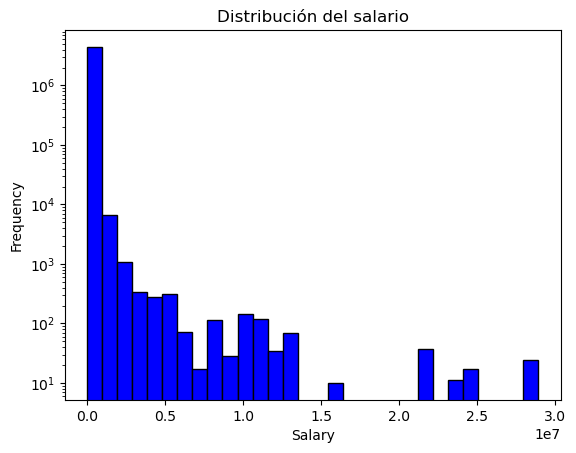

In [217]:
plt.hist(df['salary'], bins=30, color='blue', edgecolor='black',log=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribución del salario')
plt.show()

In [218]:
df.query('salary<0')

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name


Voy a crear una variable categórica para analizar el salario según cuadro grupos (salario bajo, medio bajo, medio alto y alto) usando los cuantiles.

In [219]:
cuantiles = df['salary'].describe(percentiles=[0.25, 0.5, 0.75])
cuantiles

count    4.450821e+06
mean     1.158167e+05
std      1.995519e+05
min      1.202730e+03
25%      6.150063e+04
50%      8.865465e+04
75%      1.316699e+05
max      2.889440e+07
Name: salary, dtype: float64

In [220]:
df.loc[ (df['salary'] <= 61500.63), 'salary_categ'  ]='salario_bajo'
df.loc[ (df['salary'] > 61500.63) & (df['salary'] <= 88654.65), 'salary_categ'  ]='salario_mediobajo'
df.loc[ (df['salary'] >  88654.65) & (df['salary'] <= 131669.91), 'salary_categ'  ]='salario_medioalto'
df.loc[ (df['salary'] > 131669.91) , 'salary_categ'  ]='salario_alto'
df.loc[ (df['salary'].isnull()) , 'salary_categ'  ]='Desconocido'

In [221]:
df.salary.fillna(-999, inplace=True)

In [222]:
clases=df.salary_categ.value_counts()

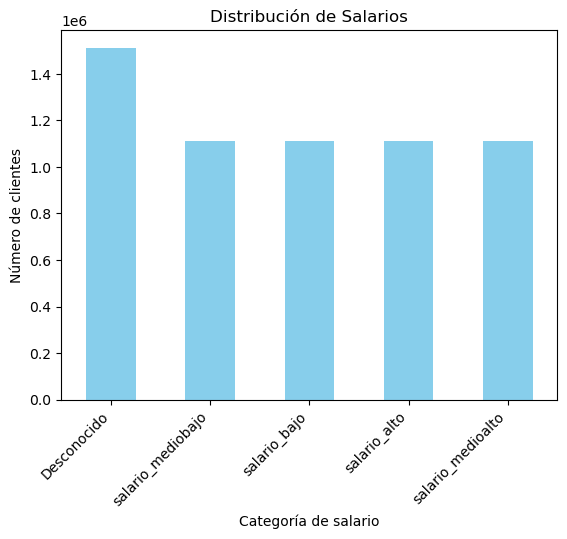

In [223]:
# Crear el gráfico de barras
clases.plot(kind='bar', color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Categoría de salario')
plt.ylabel('Número de clientes')
plt.title('Distribución de Salarios')

# Rotar etiquetas en el eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

## Cambiando tipos de variables

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 29 columns):
 #   Column              Dtype   
---  ------              -----   
 0   pk_cid              int64   
 1   pk_partition        object  
 2   entry_date          object  
 3   entry_channel       category
 4   active_customer     float64 
 5   segment             object  
 6   short_term_deposit  int64   
 7   loans               int64   
 8   mortgage            int64   
 9   funds               int64   
 10  securities          int64   
 11  long_term_deposit   int64   
 12  em_account_pp       int64   
 13  credit_card         int64   
 14  payroll             float64 
 15  pension_plan        float64 
 16  payroll_account     int64   
 17  emc_account         int64   
 18  debit_card          int64   
 19  em_account_p        int64   
 20  em_acount           int64   
 21  country_id          object  
 22  region_code         category
 23  gender              object  
 24

In [225]:
df['gender']=df.gender.astype('category')
df['segment']=df.segment.astype('category')
df['country_id']=df.country_id.astype('category')
df['pk_partition'] = pd.to_datetime(df['pk_partition'], format="%Y-%m-%d")

datos= ['payroll','pension_plan','active_customer']
df[datos]=df[datos].astype('int64')

In [226]:
print(df.iloc[688])

pk_cid                            1051705
pk_partition          2018-01-28 00:00:00
entry_date                     2015-08-14
entry_channel                         KHD
active_customer                         0
segment                     universitario
short_term_deposit                      0
loans                                   0
mortgage                                0
funds                                   0
securities                              0
long_term_deposit                       0
em_account_pp                           0
credit_card                             0
payroll                                 0
pension_plan                            0
payroll_account                         0
emc_account                             0
debit_card                              0
em_account_p                            0
em_acount                               1
country_id                             ES
region_code                           6.0
gender                            

No me deja convertir a datetime la columna de 'entry_date' por la columna en posición 688, pero al hacer iloc no parece que haya nada mal, así que reemplazo los valores problemáticos por nan y creo una columna nueva con esta info. Después, localizo los nan de esa columna y descubro que es porque la 'entry_date' es 29 de febrero. Sustituyo por 1 de marzo y convierto a datetime.

In [227]:
df['entry_date_prueba'] = pd.to_datetime(df['entry_date'], format="%Y-%m-%d", errors='coerce')
problematic_rows = df[df['entry_date_prueba'].isna()]
problematic_rows.entry_date.value_counts()

entry_date
2019-02-29    4621
2015-02-29    1792
Name: count, dtype: int64

In [228]:
df['entry_date']=np.where(df['entry_date']=='2015-02-29','2015-03-01',df['entry_date'])
df['entry_date']=np.where(df['entry_date']=='2019-02-29','2019-03-01',df['entry_date'])
df.drop('entry_date_prueba', axis=1, inplace=True)

In [229]:
df['entry_date'] = pd.to_datetime(df['entry_date'], format="%Y-%m-%d")

# Creación de variables de interés

Carol (CEO) dice en un email que no saben cuántos productos han vendido al mes ni si son clientes nuevos o viejos.

## Diferencias mensuales por producto

In [230]:
productos=['loans', 'mortgage', 'funds', 'securities',
           'long_term_deposit', 'em_account_pp', 'credit_card',
           'payroll', 'pension_plan', 'payroll_account', 'emc_account',
           'debit_card', 'em_account_p', 'em_acount', 'short_term_deposit']

In [231]:
def diferencia_mensual_producto (df, producto):
    df[producto+'_pm']  = df.groupby('pk_cid')[producto].shift(1) #columna para valores mes anterior
    df['dif_'+producto] = df[producto] - df[producto+'_pm']
    df.drop(producto+'_pm',axis=1,inplace=True)

In [232]:
df_ordenado = df.sort_values(by=['pk_cid', 'pk_partition'])

In [233]:
for p in productos:
    diferencia_mensual_producto(df_ordenado,p)

## Variable clientes nuevos

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 29 columns):
 #   Column              Dtype         
---  ------              -----         
 0   pk_cid              int64         
 1   pk_partition        datetime64[ns]
 2   entry_date          datetime64[ns]
 3   entry_channel       category      
 4   active_customer     int64         
 5   segment             category      
 6   short_term_deposit  int64         
 7   loans               int64         
 8   mortgage            int64         
 9   funds               int64         
 10  securities          int64         
 11  long_term_deposit   int64         
 12  em_account_pp       int64         
 13  credit_card         int64         
 14  payroll             int64         
 15  pension_plan        int64         
 16  payroll_account     int64         
 17  emc_account         int64         
 18  debit_card          int64         
 19  em_account_p        int64         
 20  em

Creo una variable para clientes nuevos. La lógica es la siguiente: si la fecha de ingesta de datos o pk_partition (momento en el que se contrata el producto al que hace referencia la entrada) es posterior a la fecha de primera contratación o entry_date, la variable vale 0. De lo contrario, 1 (si ambas fechas coinciden, la entrada hace referencia a la primera contratación, y en el caso de que la fecha de ingesta de datos sea anterior a la primera contratación es por una diferencia de uno o dos días, y parece que esto se debe a que el pk_partition se recoge sólo el día 28 de cada mes, por lo que lo consideraremos como nuevo).

In [235]:
for i in ["pk_partition","entry_date"]:
    df_ordenado[i]=pd.to_datetime(df_ordenado[i], format='%Y-%m-%d')

In [236]:
# We do the subtraction of the position date with the entry date and we convert it in months
df_ordenado['meses_alta']=(df_ordenado['pk_partition']-df_ordenado['entry_date'])/np.timedelta64(1,'M')

In [237]:
#como la fecha de ingesta se hace siempre el día 28 del mes, va a haber clientes que tengan un tiempo de alta negativo 
#porque va a haber clientes que tengan entry_date en días entre el 29 y el 31
len(df_ordenado[df_ordenado['meses_alta']<0])

11586

In [238]:
df_ordenado[df_ordenado['meses_alta']<0].agg({'em_acount':np.sum,
'loans':np.sum,
 'mortgage':np.sum,
 'funds':np.sum,
 'securities':np.sum,
 'long_term_deposit':np.sum,
 'em_account_pp':np.sum,
 'credit_card':np.sum,
 'payroll':np.sum,
 'pension_plan':np.sum,
 'payroll_account':np.sum,
 'emc_account':np.sum,
 'debit_card':np.sum,
 'em_account_p':np.sum,
 'em_acount':np.sum})

em_acount            931
loans                  0
mortgage               0
funds                  0
securities             0
long_term_deposit     20
em_account_pp          0
credit_card            0
payroll                0
pension_plan           0
payroll_account       13
emc_account            0
debit_card             0
em_account_p           0
dtype: int64

In [239]:
df_ordenado[df_ordenado['meses_alta']<0]['meses_alta'].value_counts()

meses_alta
-0.032258    5103
-0.064516    4707
-0.096774    1776
Name: count, dtype: int64

In [240]:
df_ordenado['new_client']=((df_ordenado['meses_alta'] < 1) & 
                          (df_ordenado['meses_alta'] > 0)).astype(int)

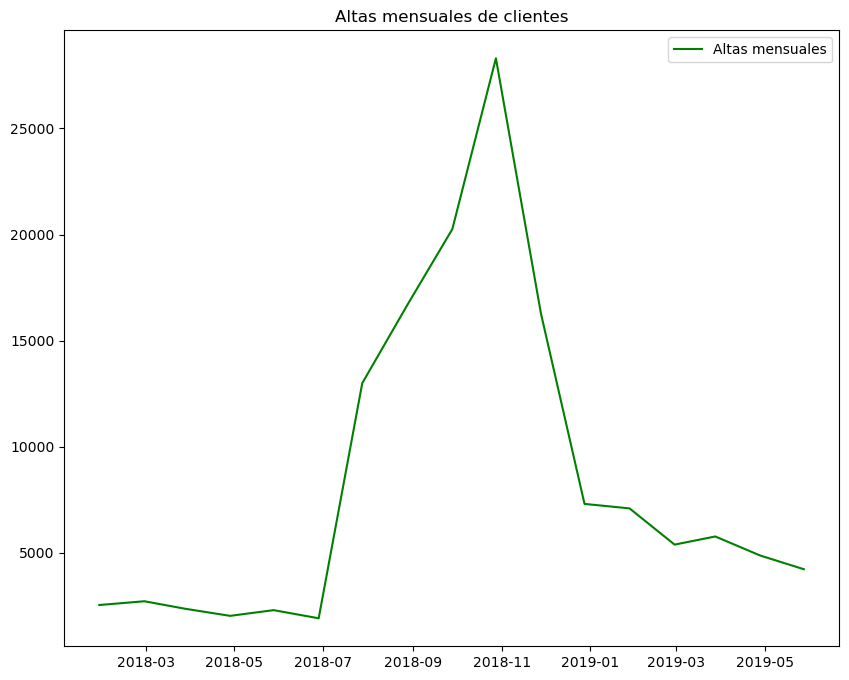

In [241]:
df_altas=df_ordenado.groupby(['pk_partition'])['new_client'].sum()
fig = plt.figure(figsize = (10, 8))
plt.plot(df_altas, color = "green", label = "Altas mensuales")
plt.title("Altas mensuales de clientes")
plt.legend()

Al hacer los diferenciales, los primeros registros van a ser nulos. Hay 3 posibles casos:
- Clientes antiguos cuyo primer registro de la muestra sea 0 en todos los productos: en este caso, el nulo equivaldría a 0.
- Clientes antiguos cuyo primer registro sea distinto de 0 en todos los productos. Como no tenemos información anterior a la muestra, no podemos suponer que sean altas (pueden ser productos que tienen dados de alta desde hace tiempo, y asignarles un valor distinto de 0 distorsionaría la muestra).
- Clientes nuevos con valores distintos de 0. En este caso, al ser clientes nuevos, los productos serán 100% altas, por lo que le asignaremos el valor que tenga la variable no diferencial a la variable diferencial.

In [242]:
for x in productos:
    df_ordenado.loc[ (df_ordenado['new_client']==1) &
                   (df_ordenado['dif_'+x].isnull()==True), 
                  'dif_'+x]=df_ordenado[x]

## Productos contratados por cada cliente

Creo un df de productos con melt, convirtiendo las columnas de la lista `productos` en filas y creo 2 columnas

In [243]:
df_productos=df_ordenado.melt(id_vars=['pk_partition','pk_cid'], value_vars=productos, var_name='Producto', value_name='Count')

Sumo las cantidades de productos para cada cliente cada día registrado

In [244]:
df_productos

,pk_partition,pk_cid,Producto,Count
0,2018-07-28,15891,loans,0
1,2018-08-28,15891,loans,0
2,2018-11-28,16063,loans,0
3,2018-12-28,16063,loans,0
4,2019-01-28,16063,loans,0
...,...,...,...,...
89443855,2019-05-28,1553685,short_term_deposit,0
89443856,2019-05-28,1553686,short_term_deposit,0
89443857,2019-05-28,1553687,short_term_deposit,0
89443858,2019-05-28,1553688,short_term_deposit,0


In [245]:
# Agrupar por 'pk_partition' y 'pk_cid', sumar las cantidades ('Count')
df_productos=df_productos.groupby(['pk_partition','pk_cid']).agg({'Count':np.sum}).reset_index(drop=False)

In [246]:
df_productos.rename(columns={'Count':'productos_totales'}, inplace=True)

In [247]:
df_ordenado=pd.merge(df_ordenado,df_productos, how="inner",on=['pk_cid','pk_partition'])

## Ingresos mensuales

Para los clientes nuevos, como no hay valores anteriores, tendremos un nan, pero es probable que en esa primera entrada haya contratado productos, así que hay que solucionarlo.
Pongo para todos 0

In [248]:
#quiero juntar las diferencias con mi df
primeras_dif=['dif_debit_card',              
'dif_em_account_p',               
'dif_em_account_pp',              
'dif_em_acount',                  
'dif_emc_account',                
'dif_payroll',                   
'dif_payroll_account',            
'dif_funds',                      
'dif_long_term_deposit',         
'dif_mortgage',                   
'dif_pension_plan',               
'dif_securities',                
'dif_short_term_deposit',        
'dif_loans',                      
'dif_credit_card']  

In [249]:
df_ing=df_ordenado.melt(id_vars=['pk_partition','pk_cid'],
              value_vars=primeras_dif,
              var_name='productos_totales',
              value_name='Count')

In [250]:
df_ing['Count'].value_counts()

Count
 0.0    84026250
 1.0      331059
-1.0      196041
Name: count, dtype: int64

In [251]:
# creo un df con las altas, porque los ingresos solo van asociados a altas
df_altas=df_ing[df_ing['Count']==1]

In [252]:
ingresos={'dif_debit_card':10 ,              
'dif_em_account_p':10 ,               
'dif_em_account_pp':10 ,              
'dif_em_acount':10 ,                  
'dif_emc_account':10 ,                
'dif_payroll':10 ,                   
'dif_payroll_account':10 ,            
'dif_funds':40 ,                      
'dif_long_term_deposit':40 ,         
'dif_mortgage':40 ,                   
'dif_pension_plan':40 ,               
'dif_securities':40 ,                
'dif_short_term_deposit':40 ,        
'dif_loans':60 ,                      
'dif_credit_card':60 }

In [253]:
df_altas['ingresos_producto']=df_altas['productos_totales'].map(ingresos)

/var/folders/v8/ttzsnn891fd42qm8ffd92scm0000gp/T/ipykernel_33598/3928520534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_altas['ingresos_producto']=df_altas['productos_totales'].map(ingresos)


In [254]:
df_altas['ingresos']=df_altas['Count']*df_altas['ingresos_producto']

/var/folders/v8/ttzsnn891fd42qm8ffd92scm0000gp/T/ipykernel_33598/191210926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_altas['ingresos']=df_altas['Count']*df_altas['ingresos_producto']


In [255]:
clientes_ingresos=df_altas.groupby(['pk_partition','pk_cid'])\
    .agg({'ingresos_producto':np.sum}).reset_index(drop=False)

In [256]:
df_ordenado =pd.merge(df_ordenado , clientes_ingresos, 
                    how="left",on=['pk_cid','pk_partition'])

In [257]:
df_ordenado['ingresos_producto'].fillna(0,inplace=True)

In [258]:
for p in productos:
    df_ordenado.loc[ (df_ordenado['new_client']==1) &
                   (df_ordenado['dif_'+p].isnull()==True), 
                  'dif_'+p]=df_ordenado[p]

In [259]:
for p in productos:
    df_ordenado.loc[ (df_ordenado['new_client']==0) &
                   (df_ordenado['dif_'+p].isnull()==True), 
                  'dif_'+p]=0

In [260]:
df_ordenado['ingresos_producto'].describe()

count    5.962924e+06
mean     8.932346e-01
std      5.679151e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.500000e+02
Name: ingresos_producto, dtype: float64

## Clientes fantasma o inactivos

Veo que hay clientes que en toda la muestra no han adquirido ningún producto, por lo que voy a crear una columna para designarlos.

In [261]:
df.query('pk_cid==16063') #clientes no activos

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount,country_id,region_code,gender,age,deceased,salary,region_name,salary_categ
2962973,16063,2018-11-28,2018-11-19,KAT,1,desconocido,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido
3628236,16063,2018-12-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido
4028169,16063,2019-01-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido
4480637,16063,2019-02-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido
4876040,16063,2019-03-28,2018-11-19,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido
5134317,16063,2019-04-28,2018-11-19,KAT,1,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido
5523397,16063,2019-05-28,2018-11-19,KAT,0,particulares,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ES,28.0,H,62,0,-999.0,Madrid,Desconocido


In [262]:
# Calcula la suma de productos_totales por cliente y justo con el df principal
suma_productos_cliente = df_ordenado.groupby('pk_cid')['productos_totales'].sum().reset_index()
suma_productos_cliente = suma_productos_cliente.rename(columns={'productos_totales': 'suma_productos_totales'})

df_ordenado = pd.merge(df_ordenado, suma_productos_cliente, on='pk_cid', how='left')

# creo una columna binaria para si el cliente es activo en algún momento de la muestra y borro
df_ordenado['cliente_activo'] = np.where(df_ordenado['suma_productos_totales'] == 0, 0, 1)
df_ordenado = df_ordenado.drop(columns=['suma_productos_totales'])

Lo guardo en un archivo comprimido para que no me ocupe espacio.

In [263]:
df_ordenado.to_pickle('EasyMoney_base.pkl', compression='zip')